Question 1: Compare 2018 and 2019 NYC mean airbnb prices to 2022 and 2023. See how pandemic effected prices in Different Boroughs

In [153]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import geopandas as gpd
import re
from datetime import datetime


%matplotlib inline

Gather Data

In [154]:
# import data
airbnbdf = pd.read_csv('NYC-Airbnb-2023.csv')

/var/folders/87/90shtrdd6xz3pgj43xy9w8rc0000gn/T/ipykernel_7354/865243091.py:2: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



In [155]:
# show all columns
pd.set_option('display.max_columns', None)

In [156]:
#Inspect the data
airbnbdf.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [157]:
# inspect data
airbnbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

In [158]:
# check for na
airbnbdf.isna().sum()

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64

In [159]:
# drop license column bc all null
newairbnb = airbnbdf.drop(['license'], axis = 1)
newairbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2019-12-02,0.30,2,365,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,2017-07-21,0.72,1,0,0
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,575,2023-02-19,3.41,1,106,52
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,839753193689829909,bright studio in Williamsburg,28057253,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,7,0,NaN,NaN,1,8,0
42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,30,0,NaN,NaN,5,79,0
42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,3,0,NaN,NaN,8,356,0
42929,839814083143454171,The Coziest Home,48533809,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,1,0,NaN,NaN,1,87,0


In [160]:
# fill categorical variables with Unknown for na
newairbnb = newairbnb.fillna('Unknown')

In [161]:
# summarize df
newairbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,24.054809,140.262211,7.736507
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,80.867958,142.001486,18.290256
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,1.000000,89.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,4.000000,289.000000,7.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,526.000000,365.000000,1093.000000


In [162]:
# remove all null lastreview columns
newairbnb = newairbnb.drop(newairbnb[newairbnb['last_review'] == 'Unknown'].index)
print(lastreviewdf['last_review'].min())
print(lastreviewdf['last_review'].max())

2011-05-12 00:00:00
2023-03-06 00:00:00


In [163]:
# Convert to datetime column and new df from 2018 to 2019
newairbnb['last_review'] = pd.to_datetime(newairbnb['last_review'])
newairbnb1819 = newairbnb[(newairbnb['last_review'] >= '2018-01-01') & (newairbnb['last_review'] < '2020-01-01') ]
print(newairbnb1819['last_review'].min())
print(newairbnb1819['last_review'].max())

2018-01-01 00:00:00
2019-12-31 00:00:00


In [164]:
# check for consistency within columsn
newairbnb1819['neighbourhood_group'].value_counts()

neighbourhood_group
Brooklyn         1567
Manhattan        1523
Queens            478
Bronx              84
Staten Island      16
Name: count, dtype: int64

In [165]:
newairbnb1819['room_type'].value_counts()

room_type
Entire home/apt    1840
Private room       1751
Shared room          60
Hotel room           17
Name: count, dtype: int64

In [166]:
# summary of price var
newairbnb1819['price'].describe()

count     3668.000000
mean       147.914667
std        298.345895
min         10.000000
25%         65.000000
50%        100.000000
75%        165.000000
max      10000.000000
Name: price, dtype: float64

In [167]:
neighbourhoodprice1819 = newairbnb1819.groupby('neighbourhood_group')[['price']].mean()
neighbourhoodprice1819

,price
neighbourhood_group,
Bronx,88.142857
Brooklyn,121.103382
Manhattan,187.045305
Queens,122.410042
Staten Island,124.750000


In [168]:
# Load the shapefile for NYC boroughs
nyc_map1819 = gpd.read_file('/Users/nicholasqualitza/AirbnbNYC/NYCImage/geo_export_d0c1c432-91a9-4748-9073-a836954f34ab.shp')

In [169]:
nyc_map1819

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,1.0,Manhattan,6.365205e+08,357713.308162,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,2.0,Bronx,1.187175e+09,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,3.0,Brooklyn,1.934138e+09,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4.0,Queens,3.041419e+09,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [170]:
# merge nyc_map and neighbourhoodprice

merged_data1819 = nyc_map.merge(neighbourhoodprice1819, left_on='boro_name', right_on='neighbourhood_group')

In [171]:
merged_data1819

,boro_code,boro_name,shape_area,shape_leng,geometry,price
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",124.750000
1,1.0,Manhattan,6.365205e+08,357713.308162,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",187.045305
2,2.0,Bronx,1.187175e+09,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",88.142857
3,3.0,Brooklyn,1.934138e+09,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",121.103382
4,4.0,Queens,3.041419e+09,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",122.410042


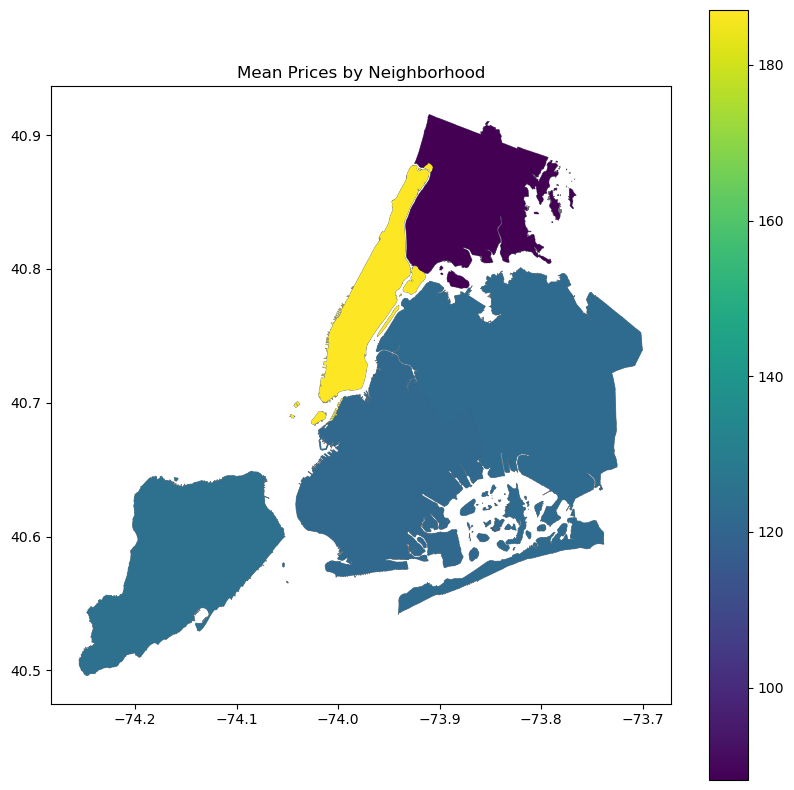

In [172]:
# Plot the NYC map
nyc_map1819.plot(figsize=(10, 10), edgecolor='k', linewidth=0.5, alpha=0.5)

# Plot the mean prices on the map
merged_data.plot(column='price', cmap='viridis', legend=True, ax=plt.gca())

# Add a title
plt.title('Mean Prices by Neighborhood')

# Show the plot
plt.show()

This is the mean prices from 2018 - 2019. Now we'll see how the mean is from Airbnb with reviews later than 2022

In [173]:
# earliest date
newairbnb['last_review'].min()

Timestamp('2011-05-12 00:00:00')

In [174]:
#latest date 
newairbnb['last_review'].max()

Timestamp('2023-03-06 00:00:00')

In [175]:
# Convert to datetime column and new df only after 1/1/22
lastreviewdf['last_review'] = pd.to_datetime(lastreviewdf['last_review'])
cutoff_date = pd.Timestamp('2022-01-01')
lastrev2223 = lastreviewdf[lastreviewdf['last_review'] > cutoff_date]
print(lastrev2223['last_review'].min())
print(lastrev2223['last_review'].max())

2022-01-02 00:00:00
2023-03-06 00:00:00


In [176]:
lastrev2223['neighbourhood_group'].value_counts()

neighbourhood_group
Brooklyn         8475
Manhattan        7675
Queens           4241
Bronx            1129
Staten Island     312
Name: count, dtype: int64

In [177]:
neighbourhoodprice2223 = lastrev2223.groupby('neighbourhood_group')[['price']].mean()
neighbourhoodprice2223

,price
neighbourhood_group,
Bronx,118.945084
Brooklyn,183.890383
Manhattan,236.871401
Queens,129.324923
Staten Island,370.980769


In [178]:
# NYC Graph by nieghbourhood
nyc_map22_23 = gpd.read_file('/Users/nicholasqualitza/AirbnbNYC/NYCImage/geo_export_d0c1c432-91a9-4748-9073-a836954f34ab.shp')

In [179]:
# merge nyc_map and neighbourhoodprice

merged_data22_23 = nyc_map22_23.merge(neighbourhoodprice2223, left_on='boro_name', right_on='neighbourhood_group')

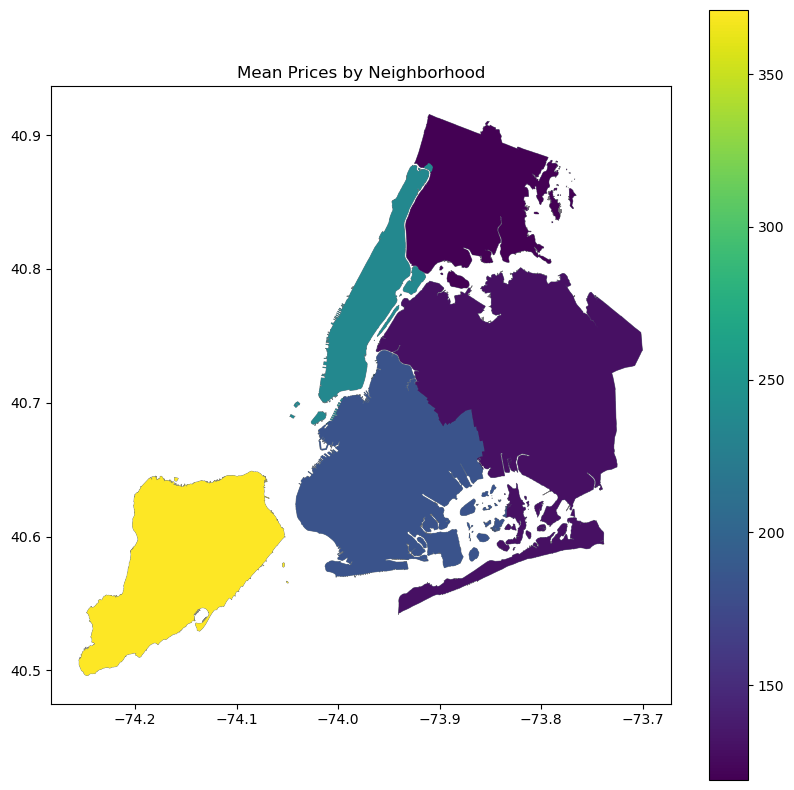

In [180]:
# Plot the NYC map
nyc_map22_23.plot(figsize=(10, 10), edgecolor='k', linewidth=0.5, alpha=0.5)

# Plot the mean prices on the map
merged_data22_23.plot(column='price', cmap='viridis', legend=True, ax=plt.gca())

# Add a title
plt.title('Mean Prices by Neighborhood')

# Show the plot
plt.show()

Check price increase per Neighbourhood

In [181]:
# Reset the index of both DataFrames
neighbourhoodprice1819 = neighbourhoodprice1819.reset_index()
neighbourhoodprice2223 = neighbourhoodprice2223.reset_index()

In [182]:
neighcompdf = pd.merge(neighbourhoodprice1819[['neighbourhood_group', 'price']], neighbourhoodprice2223[['neighbourhood_group', 'price']], on ='neighbourhood_group', how ='inner')
neighcompdf

,neighbourhood_group,price_x,price_y
0,Bronx,88.142857,118.945084
1,Brooklyn,121.103382,183.890383
2,Manhattan,187.045305,236.871401
3,Queens,122.410042,129.324923
4,Staten Island,124.750000,370.980769


In [183]:
# rename columns
neighcompdf = neighcompdf.rename(columns={'price_x': 'price_1819', 'price_y': 'price_2223'})
neighcompdf

,neighbourhood_group,price_1819,price_2223
0,Bronx,88.142857,118.945084
1,Brooklyn,121.103382,183.890383
2,Manhattan,187.045305,236.871401
3,Queens,122.410042,129.324923
4,Staten Island,124.750000,370.980769


In [184]:
# Add a new column to show percent increase
neighcompdf['percent_increase'] = ((neighcompdf['price_2223'] - neighcompdf['price_1819']) / neighcompdf['price_1819']) * 100
neighcompdf

,neighbourhood_group,price_1819,price_2223,percent_increase
0,Bronx,88.142857,118.945084,34.945800
1,Brooklyn,121.103382,183.890383,51.845787
2,Manhattan,187.045305,236.871401,26.638517
3,Queens,122.410042,129.324923,5.648950
4,Staten Island,124.750000,370.980769,197.379374


Make it gradient by using long/lat 

In [185]:
# round lat/long to 4th decimal
newairbnb1819['rounded_lat'] = newairbnb1819['latitude'].round(2)
newairbnb1819['rounded_long'] = newairbnb1819['longitude'].round(2)

/var/folders/87/90shtrdd6xz3pgj43xy9w8rc0000gn/T/ipykernel_7354/1386732868.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/87/90shtrdd6xz3pgj43xy9w8rc0000gn/T/ipykernel_7354/1386732868.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [186]:
# group long/lat 
grouped_prices1819 = newairbnb1819.groupby(['rounded_lat', 'rounded_long'])['price'].mean().reset_index()
grouped_prices1819

,rounded_lat,rounded_long,price
0,40.54,-74.14,229.000000
1,40.56,-74.10,130.000000
2,40.58,-73.97,63.666667
3,40.58,-73.96,81.000000
4,40.58,-73.95,100.000000
...,...,...,...
390,40.89,-73.91,65.000000
391,40.89,-73.90,52.500000
392,40.89,-73.85,30.000000
393,40.89,-73.84,99.500000


/var/folders/87/90shtrdd6xz3pgj43xy9w8rc0000gn/T/ipykernel_7354/1340647168.py:15: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/var/folders/87/90shtrdd6xz3pgj43xy9w8rc0000gn/T/ipykernel_7354/1340647168.py:17: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



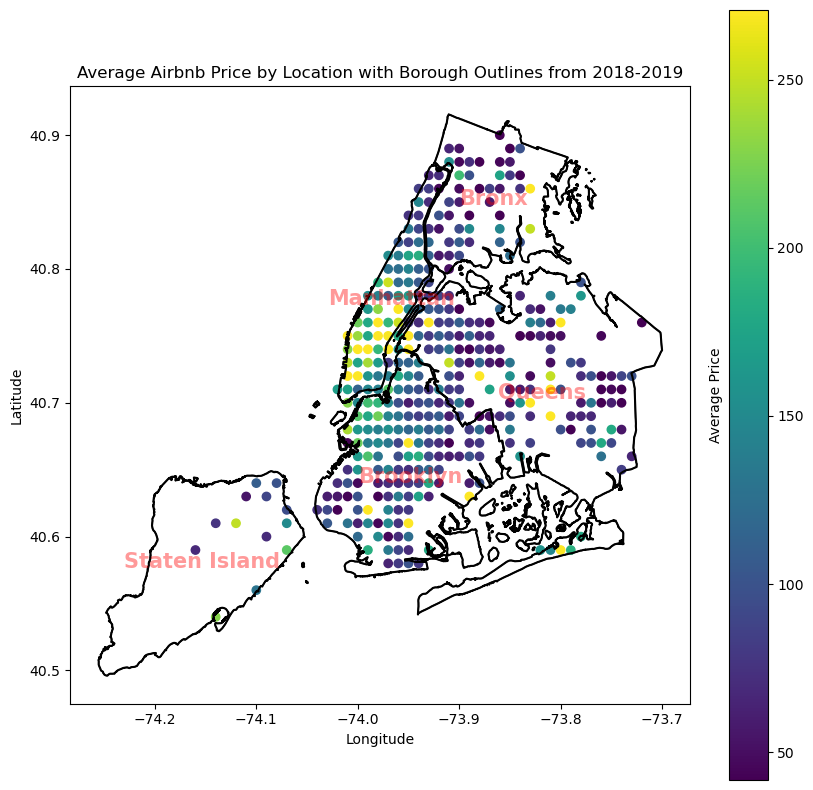

In [187]:
# Define lower and upper limit for color bar range
lower_limit = grouped_prices1819['price'].quantile(0.05)  # 5th percentile
upper_limit = grouped_prices1819['price'].quantile(0.95)  # 95th percentile

# Plot NYC map outline
nyc_map.plot(color='white', edgecolor='black', figsize=(10, 10))

# Plot the grouped data with gradient color representing average price
plt.scatter(grouped_prices1819['rounded_long'], grouped_prices1819['rounded_lat'], c=grouped_prices1819['price'], cmap='viridis', vmin=lower_limit, vmax=upper_limit)
cbar = plt.colorbar(label='Average Price')
cbar.ax.yaxis.set_label_position('left')  # Position the color bar labels to the left

# Add borough outlines with labels
for idx, row in nyc_map.iterrows():
    if row.geometry.type == 'Polygon':
        plt.plot(*row.geometry.exterior.xy, color='black')
    elif row.geometry.type == 'MultiPolygon':
        for polygon in row.geometry.geoms:
            plt.plot(*polygon.exterior.xy, color='black')
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['boro_name'], fontsize=15, ha='center', va='center', fontweight='bold', color='red', alpha=0.4)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Airbnb Price by Location with Borough Outlines from 2018-2019')
plt.show()

Repeat same for 22-23 data

In [188]:
# round lat/long to 4th decimal
lastrev2223['rounded_lat'] = lastrev2223['latitude'].round(2)
lastrev2223['rounded_long'] = lastrev2223['longitude'].round(2)
lastrev2223

/var/folders/87/90shtrdd6xz3pgj43xy9w8rc0000gn/T/ipykernel_7354/119314601.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/87/90shtrdd6xz3pgj43xy9w8rc0000gn/T/ipykernel_7354/119314601.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rounded_lat,rounded_long
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,49,2022-06-21,0.3,3,314,1,40.75,-73.99
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,575,2023-02-19,3.41,1,106,52,40.76,-73.98
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,40.66,-73.99
5,29628,"Comfortable, Sunny Room",127608,Chris,Brooklyn,Clinton Hill,40.682920,-73.963810,Private room,93,3,350,2023-02-27,2.25,1,145,48,40.68,-73.96
6,5586,Rooftop Deck/City Views. Great Apt,8526,Susan,Manhattan,Upper East Side,40.760760,-73.961560,Entire home/apt,295,4,45,2022-10-03,0.27,1,1,4,40.76,-73.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42578,835703681287484641,*Brand New *Blue Curtains,77063818,Angela,Brooklyn,Bay Ridge,40.634704,-74.017397,Entire home/apt,131,1,1,2023-03-05,1.0,8,63,1,40.63,-74.02
42698,838131275214287871,2BR/1BA Apartment in Midtown!,234755971,Aiza,Manhattan,Midtown,40.764888,-73.982095,Entire home/apt,229,1,1,2023-03-03,1.0,2,323,1,40.76,-73.98
42757,837075395576130377,"Private room #3@Two Bridges Queen bed, desk an...",83651013,Chapman,Manhattan,Two Bridges,40.711940,-73.995540,Private room,75,1,1,2023-03-05,1.0,2,61,1,40.71,-74.00
42841,838548659003355204,Fantastic 3BD space in Bushwick,503378668,Regalia,Brooklyn,Bushwick,40.688216,-73.906565,Entire home/apt,144,1,2,2023-03-05,2.0,1,356,2,40.69,-73.91


In [189]:
# group long/lat 
grouped_prices2223 = lastrev2223.groupby(['rounded_lat', 'rounded_long'])['price'].mean().reset_index()
grouped_prices2223

,rounded_lat,rounded_long,price
0,40.50,-74.25,110.000000
1,40.50,-74.24,99.000000
2,40.51,-74.24,508.000000
3,40.52,-74.22,171.000000
4,40.52,-74.21,107.666667
...,...,...,...
677,40.90,-73.86,87.260870
678,40.90,-73.85,136.777778
679,40.90,-73.84,107.875000
680,40.91,-73.90,129.666667


/var/folders/87/90shtrdd6xz3pgj43xy9w8rc0000gn/T/ipykernel_7354/560043924.py:15: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/var/folders/87/90shtrdd6xz3pgj43xy9w8rc0000gn/T/ipykernel_7354/560043924.py:17: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



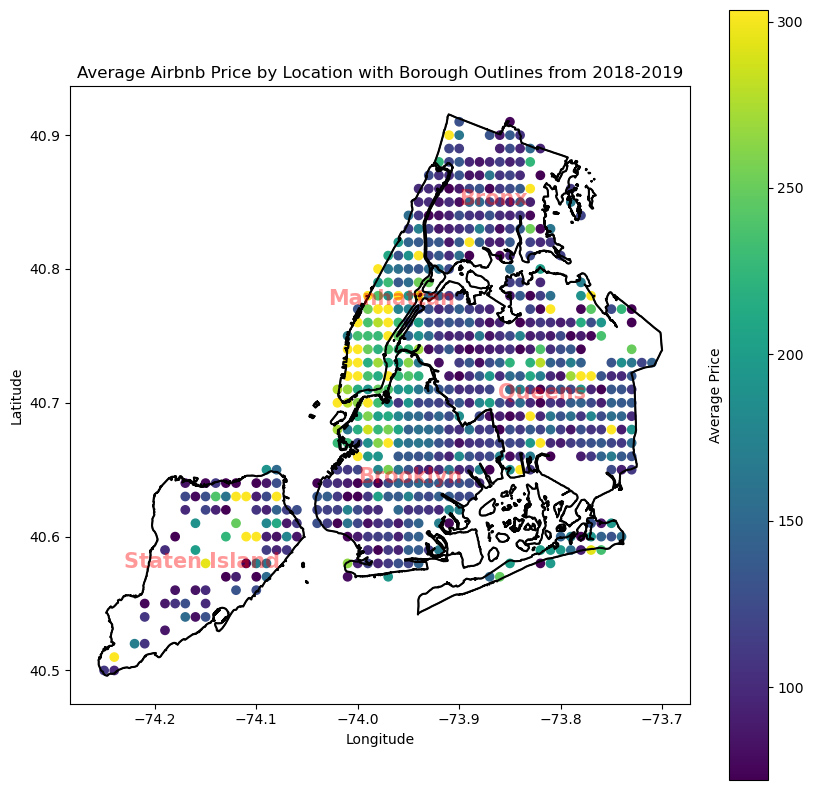

In [190]:
# Define lower and upper limit for color bar range
lower_limit = grouped_prices2223['price'].quantile(0.05)  # 5th percentile
upper_limit = grouped_prices2223['price'].quantile(0.95)  # 95th percentile

# Plot NYC map outline
nyc_map.plot(color='white', edgecolor='black', figsize=(10, 10))

# Plot the grouped data with gradient color representing average price
plt.scatter(grouped_prices2223['rounded_long'], grouped_prices2223['rounded_lat'], c=grouped_prices2223['price'], cmap='viridis', vmin=lower_limit, vmax=upper_limit)
cbar = plt.colorbar(label='Average Price')
cbar.ax.yaxis.set_label_position('left')  # Position the color bar labels to the left

# Add borough outlines with labels
for idx, row in nyc_map.iterrows():
    if row.geometry.type == 'Polygon':
        plt.plot(*row.geometry.exterior.xy, color='black')
    elif row.geometry.type == 'MultiPolygon':
        for polygon in row.geometry.geoms:
            plt.plot(*polygon.exterior.xy, color='black')
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['boro_name'], fontsize=15, ha='center', va='center', fontweight='bold', color='red', alpha=0.4)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Airbnb Price by Location with Borough Outlines from 2018-2019')
plt.show()